## Mohammad Rashid Mohammad Shoaib    ME592 HW#1   2/16/2023

## *Problem 2.1 MNIST Images*

In [2]:
import torch
import torchvision
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from einops import rearrange

In [3]:
mnist_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
mnist_subset = torch.utils.data.Subset(mnist_dataset, np.random.choice(len(mnist_dataset), size=1000, replace=False))

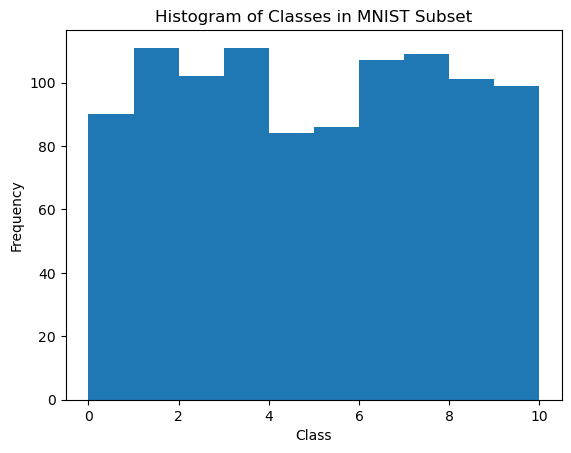

In [4]:
# Plot a histogram of classes in the subset of MNIST
classes = [data[1] for data in mnist_subset]
plt.hist(classes, bins=range(11))
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Histogram of Classes in MNIST Subset')
plt.show()

In [5]:
# Batch the subset of MNIST images using einops
batch_size = 25
batches = rearrange(mnist_subset, '(n b) c w h -> (n b) c (w h)', n=len(mnist_subset) // batch_size, b=batch_size)

RuntimeError: Tensor type unknown to einops <class 'torch.utils.data.dataset.Subset'>

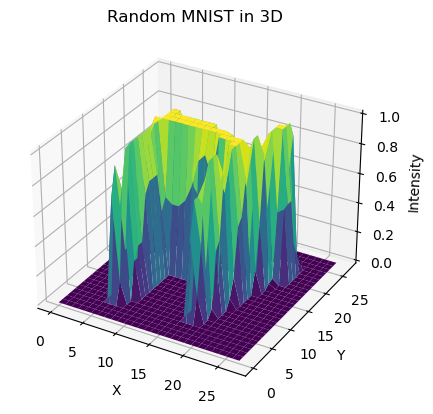

In [6]:
idx = mnist_subset[np.random.randint(len(mnist_subset))]
image = idx[0].squeeze().numpy()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y = np.meshgrid(np.arange(image.shape[1]), np.arange(image.shape[0]))
ax.plot_surface(x, y, image, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Intensity')
plt.title('Random MNIST in 3D')
plt.show()